In [12]:
import requests
from addict import Dict
from collections import namedtuple
import matplotlib.pyplot as plt
import numpy as np

In [13]:
Result = namedtuple('Result', ['wall_time','step','value'])
base_url="http://bigboss:9849/data/plugin/scalars/scalars"

In [14]:
metric_names = ("eval_average_accuracy_model_for_curriculum_idx", "train_running_average_accuracy_model_idx_")
levels = tuple(map(str, range(0, 20)))
current_task_metric = "train_running_average_accuracy_model_idx_"
tranfer_metric_name = "eval_average_accuracy_model_for_curriculum_idx"
model_to_name_dict = {}
# model_to_name_dict["128"] = "128"
model_to_name_dict["256"] = "large"
model_to_name_dict["128_gem_net2net_256"] = "small+gem+net2net"
model_to_name_dict["256_gem"] = "large+gem"
model_to_name_dict["128_net2net_256"] = "small+net2net"
model_to_name_dict["128_gem_net2net"] = "small+gem+net2net"
model_to_name_dict["128_net2net"] = "small+net2net"
break_index = {"128": 8,
               "128_gem": 6}

model_to_label_map = {
    "128": "small-Lstm",
    "128_gem": "small-Lstm-Gem",
    "128_net2net_256": "small-Lstm-Net2Net", 
    "128_net2net": "small-Lstm-Net2Net", 
    "128_gem_net2net_256": "small-Lstm-Gem-Net2Net", 
    "128_gem_net2net": "small-Lstm-Gem-Net2Net", 
    "256": "large-Lstm", 
    "256_gem": "large-Lstm-Gem"
}

In [15]:
model_names = ("128_net2net_256", "128_gem_net2net_256", "256", "256_gem")
metric = current_task_metric
level = 0
color_map = {
    '128_gem_net2net_256': 'tab:blue',
    '128_gem_net2net': 'tab:blue',
    '128_net2net_256': 'tab:orange',
    '128_net2net': 'tab:orange',
    '256': 'tab:green',
    '256_gem': 'tab:red',
    '128': 'tab:purple', 
    '128_gem': 'tab:brown'
}

In [20]:
def get_result_for_model(task, model, metric, level):
    params = Dict()
    if task:
        params.run = "{}/{}".format(task, model)
    else:
        params.run = model
    params.tag = "{}{}".format(metric, level)
    r = requests.get(base_url, params)
#     print(r.url)
    if(r.status_code!=200):
        print(r.url)
#     else:
#         print("yay")
#         print("Error")
        return None
    result = list(map(lambda x: Result(*x), r.json()))
    return result

def get_current_task_accuracy(task, model, level):
    result = get_result_for_model(task, model, metric=current_task_metric, level=level)
    if result:
        return result[-1]
    else:
        None
        
def get_current_performance_for_all_models_all_levels(task):
    current_task_performance = {}
    for m in model_names:
        current_task_performance[m] = {}
        for l in levels:
            res = get_current_task_accuracy(task, m, l)
            if res:
                current_task_performance[m][l] = res
            else:
                break
    return current_task_performance


http://bigboss:9849/data/plugin/scalars/scalars?run=128_net2net_256&tag=train_running_average_accuracy_model_idx_11
http://bigboss:9849/data/plugin/scalars/scalars?run=128_gem_net2net_256&tag=train_running_average_accuracy_model_idx_6
http://bigboss:9849/data/plugin/scalars/scalars?run=256&tag=train_running_average_accuracy_model_idx_11
http://bigboss:9849/data/plugin/scalars/scalars?run=256_gem&tag=train_running_average_accuracy_model_idx_6


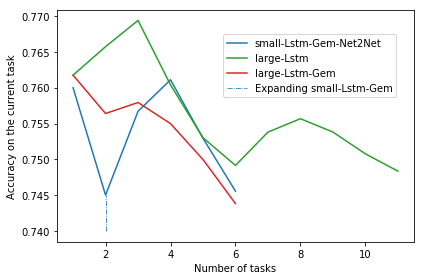

<Figure size 432x288 with 0 Axes>

In [34]:
def generate_current_accuracy_plots(task):
    
    current_task_performance = get_current_performance_for_all_models_all_levels(task)
#     for m in ["128", "128_gem"]:
#         if(not current_task_performance[m]):
#             new_key = m+"_net2net"
#             data_to_search_index_from = list(map(lambda x: x.step, current_task_performance[new_key].values()))
#             print(data_to_search_index_from)
#             index = [_index for _index in enumerate(data_to_search_index_from) if data_to_search_index_from[_index] > 30000  ]
#             print(index)
#             current_task_performance
    model_names = ("128_gem_net2net_256", "256", "256_gem")
    for m in model_names:
        y = list(map(lambda key_value: key_value[1].value, current_task_performance[m].items()))
        x = list(range(1, len(y)+1))
        plt.plot(x, y, label=model_to_label_map[m], color=color_map[m])
        plt.xlabel("Number of tasks")
        plt.ylabel("Accuracy on the current task")
    
    plt.plot([2, 2], [0.74, 0.745], '-.', color = 'tab:blue', lw=0.8, label="Expanding small-Lstm-Gem")
#     plt.plot([12, 12], [0.74, 0.747], '-.', color = 'tab:orange', lw=0.8, label="Expanding Lstm-128")
    
    plt.legend(loc='center left', bbox_to_anchor=(0.45, 0.76))
#     plt.legend(loc='center left')
    file_name = "{}_{}".format(task, "current_accuracy")
    plt.tight_layout()
#     plt.savefig("ar_current_acc")
    plt.savefig('ar_current_acc.pdf', format='pdf', dpi=1000)
    plt.show()
    plt.clf()

levels = tuple(map(str, range(0, 20)))
generate_current_accuracy_plots("")

In [22]:

# Original Code
# def generate_current_accuracy_plots(task):
    
#     current_task_performance = get_current_performance_for_all_models_all_levels(task)
#     model_names = ("128_gem_net2net_256", "256", "256_gem")
#     for m in model_names:
#         y = list(map(lambda key_value: key_value[1].value, current_task_performance[m].items()))
#         x = list(range(1, len(y)+1))
#         plt.plot(x, y, label=model_to_label_map[m], color=color_map[m])
#         plt.xlabel("Number of tasks")
#         plt.ylabel("Accuracy on the current task")
    
#     plt.plot([6, 6], [0.74, 0.7462], '-.', color = 'tab:blue', lw=0.8, label="Expanding Lstm-128-Gem")
#     plt.plot([12, 12], [0.74, 0.747], '-.', color = 'tab:orange', lw=0.8, label="Expanding Lstm-128")
    
#     plt.legend(loc='center left', bbox_to_anchor=(0.5, 0.76))
#     file_name = "{}_{}".format(task, "current_accuracy")
#     plt.tight_layout()
#     plt.savefig("ar_current_acc")
#     plt.show()
#     plt.clf()

# generate_current_accuracy_plots("associative_recall")

http://bigboss:9849/data/plugin/scalars/scalars?run=128_net2net_256&tag=eval_average_accuracy_model_for_curriculum_idx11
http://bigboss:9849/data/plugin/scalars/scalars?run=128_gem_net2net_256&tag=eval_average_accuracy_model_for_curriculum_idx6
http://bigboss:9849/data/plugin/scalars/scalars?run=256&tag=eval_average_accuracy_model_for_curriculum_idx11
http://bigboss:9849/data/plugin/scalars/scalars?run=256_gem&tag=eval_average_accuracy_model_for_curriculum_idx6
[0.7419687509536743, 0.826171875, 0.8087708353996277, 0.7924609482288361, 0.7864125013351441, 0.7790104250113169, 0.7698392868041992, 0.7642617225646973, 0.760496523645189, 0.7553968727588654]
sum_256_gem__previous_accuracy


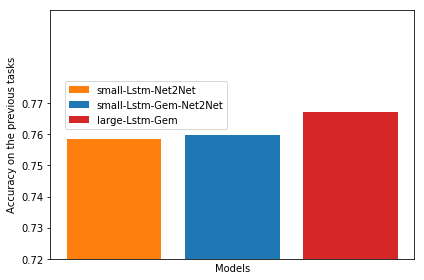

In [53]:
levels = tuple(map(str, range(1, 21)))
def get_previous_task_accuracy(task, model, level):
    result = get_result_for_model(task, model, metric=tranfer_metric_name, level=level)
    if result:
        return result[:level]
    else:
        None

def get_previous_performance_for_all_models_all_levels(task):
    previous_task_performance = {}
    for m in model_names:
        previous_task_performance[m] = {}
        for l in levels:
            res = get_previous_task_accuracy(task, m, int(l))
            if res:
                average_res = np.mean(np.asarray(list(map(lambda x: x.value, res))))
                previous_task_performance[m][l] = average_res
            else:
                break
    return previous_task_performance

def generate_previous_accuracy_plots(task):
    previous_task_performance = get_previous_performance_for_all_models_all_levels(task)
    y = []
    x = []
    fig, ax = plt.subplots(1, 1)
    curr_ax = ax
    use_mean = True
    if(use_mean):
        f = np.mean
    else:
        f = np.sum
    
    print(list(map(lambda key_value: key_value[1], previous_task_performance["128_net2net_256"].items())))
    x = ["128", "128_gem"]
    y = [f(np.asarray(list(map(lambda key_value: key_value[1], previous_task_performance["128_net2net_256"].items()))[:8])),
        f(np.asarray(list(map(lambda key_value: key_value[1], previous_task_performance["128_gem_net2net_256"].items()))[:6]))]
    model_names = ("128_net2net_256", "128_gem_net2net_256", "256_gem")
    x = []
    y = []
    for m in model_names:
        
        if(previous_task_performance[m]):
            y.append(f(np.asarray(list(map(lambda key_value: key_value[1], previous_task_performance[m].items())))))
            x.append(m)
    
    if(use_mean):
        plt.ylim(0, 1)
    else:
        plt.ylim(0, 15)
        
    for idx, (_x, _y) in enumerate(zip(x, y)):
        if(idx == 0):
            print(_y)
        curr_ax.bar(idx, _y, label=model_to_label_map[_x], align="center", color = color_map[_x])
    
    plt.legend(loc='lower right', bbox_to_anchor=(0.5, 0.5))
    file_name = "sum_{}_{}_{}".format(m, "_".join(task.split("/")), "previous_accuracy")
    plt.tick_params(
        axis='x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom=False,      # ticks along the bottom edge are off
        top=False,         # ticks along the top edge are off
        labelbottom=False
    )
    if(use_mean):
        plt.ylim(0.75, 0.8)
    else:
        plt.ylim(0.0, 10)
    
    if(use_mean):
        plt.yticks(np.arange(0.72, 0.77, 0.01))
    else:
        plt.yticks(np.arange(0.0, 10.0, 0.5))
    plt.xlabel("Models")
    plt.ylabel("Accuracy on the previous tasks")
    plt.tight_layout()
    
    print(file_name)
#     plt.savefig("prev_associative_recall")
    plt.savefig('prev_associative_recall.pdf', format='pdf', dpi=1000)
#     plt.clf()
generate_previous_accuracy_plots(task="")

# generate_previous_accuracy_plots(task="associative_recall")


In [73]:
get_previous_task_accuracy(task="associative_recall", model=model_names[0], level=10)
# get_previous_performance_for_all_models_all_levels(task="associative_recall")

[Result(wall_time=1535870531.8576179, step=0, value=0.7404999732971191),
 Result(wall_time=1535870537.5732446, step=1, value=0.7494062781333923),
 Result(wall_time=1535870544.960452, step=2, value=0.7516250014305115),
 Result(wall_time=1535870554.0195894, step=3, value=0.7568125128746033),
 Result(wall_time=1535870564.7493727, step=4, value=0.7542187571525574),
 Result(wall_time=1535870577.1428792, step=5, value=0.7547500133514404),
 Result(wall_time=1535870591.3008268, step=6, value=0.7548437714576721),
 Result(wall_time=1535870607.0816035, step=7, value=0.7523124814033508),
 Result(wall_time=1535870624.5117574, step=8, value=0.750124990940094),
 Result(wall_time=1535870643.6565368, step=9, value=0.7466874718666077)]

In [71]:
previous_task_performance = get_previous_performance_for_all_models_all_levels(task="cpu/associative_recall")
previous_task_performance

('0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19')
('0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19')
('0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19')
('0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19')


{'128_net2net_256': {}, '128_gem_net2net_256': {}, '256': {}, '256_gem': {}}

http://bigboss:9849/data/plugin/scalars/scalars?run=128_net2net_256&tag=eval_average_accuracy_model_for_curriculum_idx11
http://bigboss:9849/data/plugin/scalars/scalars?run=128_gem_net2net_256&tag=eval_average_accuracy_model_for_curriculum_idx6
http://bigboss:9849/data/plugin/scalars/scalars?run=256&tag=eval_average_accuracy_model_for_curriculum_idx11
http://bigboss:9849/data/plugin/scalars/scalars?run=256_gem&tag=eval_average_accuracy_model_for_curriculum_idx6
sum_256__previous_accuracy
[0.7314428112087042, 0.7322756197032713, 0.7410238098207121]


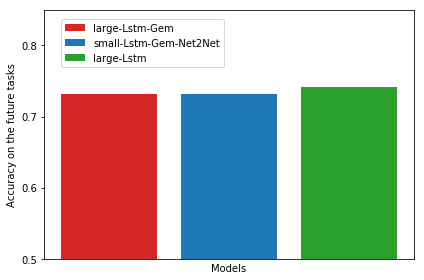

In [43]:
levels = tuple(map(str, range(0, 20)))
def get_future_task_accuracy(task, model, level):
    result = get_result_for_model(task, model, metric=tranfer_metric_name, level=level)
    if result:
        return result[level+1:20]
    else:
        None

def get_future_performance_for_all_models_all_levels(task):
    future_task_performance = {}
    for m in model_names:
        future_task_performance[m] = {}
        for l in levels:
            res = get_future_task_accuracy(task, m, int(l))
            if res:
                average_res = np.mean(np.asarray(list(map(lambda x: x.value, res))))
                future_task_performance[m][l] = average_res
            else:
                break
    return future_task_performance

def generate_future_accuracy_plots(task):
    future_task_performance = get_future_performance_for_all_models_all_levels(task)
    y = []
    x = []
    fig, ax = plt.subplots(1, 1)
    curr_ax = ax
    use_mean = True
    if(use_mean):
        f = np.mean
    else:
        f = np.sum
    x = ["128", "128_gem"]
    y = [f(np.asarray(list(map(lambda key_value: key_value[1], future_task_performance["128_net2net_256"].items()))[:8])),
        f(np.asarray(list(map(lambda key_value: key_value[1], future_task_performance["128_gem_net2net_256"].items()))[:6]))]
    
    x = []
    y = []
    model_names = ("256_gem", "128_gem_net2net_256", "256")
    
    for m in model_names:
        
        if(future_task_performance[m]):
            y.append(f(np.asarray(list(map(lambda key_value: key_value[1], future_task_performance[m].items())))))
            x.append(m)
    if(use_mean):
        plt.ylim(0.5, 0.7)
    else:
        plt.ylim(0, 15)
        
    for idx, (_x, _y) in enumerate(zip(x, y)):
        curr_ax.bar(idx, _y, label=model_to_label_map[_x], align="center", color = color_map[_x])
    
    plt.legend(loc='lower right', bbox_to_anchor=(0.5, 0.75))
    file_name = "sum_{}_{}_{}".format(m, "_".join(task.split("/")), "previous_accuracy")
    plt.tick_params(
        axis='x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom=False,      # ticks along the bottom edge are off
        top=False,         # ticks along the top edge are off
        labelbottom=False
    )
    plt.ylim(0.5, 0.85)
    
    plt.yticks(np.arange(0.5, 0.9, 0.1))
    plt.xlabel("Models")
    plt.ylabel("Accuracy on the future tasks")
    plt.tight_layout()
    
    print(file_name)
#     plt.savefig("next_associative_recall")
    plt.savefig('next_associative_recall.pdf', format='pdf', dpi=1000)
    print(y)
#     plt.clf()
# generate_future_accuracy_plots(task="associative_recall")
generate_future_accuracy_plots(task="")